In [1]:
#import all the required libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt




In [2]:
#Get the data from local repository

path = "/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/DataRaw/StudentsPerformance.csv"
df_raw = pd.read_csv(path)



In [3]:
#show first 5 rows of dataset
df_raw.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [122]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 1000
Number of Columns: 9


In [4]:
#Data pre-processing

#we first change the column names to play with the data

newName = {'race/ethnicity' : 'race',
          'parental level of education' : 'parent_edu',
          'test preparation course' : 'test_prep',
          'math score' : 'maths',
          'reading score' : 'reading',
          'writing score' : 'writing'}
df_raw.rename(columns = newName, inplace = True)

df_raw.head()


,gender,race,parent_edu,lunch,test_prep,maths,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#let us check if we have any null values in the data
df_raw.isnull().sum()

gender        0
race          0
parent_edu    0
lunch         0
test_prep     0
maths         0
reading       0
writing       0
dtype: int64

In [6]:
#Visualization

# Now we see how good gender is on maths, reading and writing
#before visuvalizing we first see how many catigories present in gender

df_raw['gender'].unique()

array(['female', 'male'], dtype=object)

<Figure size 1080x720 with 0 Axes>

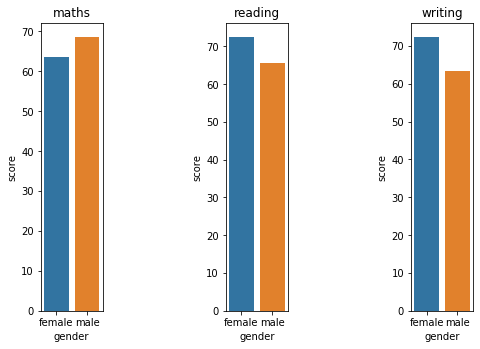

<Figure size 1080x720 with 0 Axes>

In [77]:
#gender has 'female', 'male' catigories

# now we see how 'female' & 'male' performs on maths, reading and writing

# female vs maths
# female vs reading
# female vs writing

# male vs maths
# male vs reading
# male vs writing



fig,p  = plt.subplots()
fig.subplots_adjust( hspace=2, wspace=2, left = 1, right = 2,bottom = 1,top=2)
for x in range(3):
    plt.subplot(1,3, x+1)
    df_genderresult = df_raw.groupby("gender")[list(df_raw.columns[-3:])[x]].describe()
    sn.barplot(df_genderresult.index, df_genderresult.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df_raw.columns[-3:])[x])
    

plt.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/genderimage.jpeg", dpi = 150)    

plt.figure(figsize=(15, 10))


#plt.show() 

# With the help of sublot below we can clearly state that 'male' is good at maths, where as in reading 
# writing female dominates male





In [94]:
#Visualization

# Now we see how good race is on maths, reading and writing
#before visuvalizing we first see how many catigories present in race

df_raw['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [95]:
df_raw.race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

In [97]:
# now on looking the data above, there are 5 different groups and 3 differnt area of studey i,e maths, reading and writing
# one best way is to find out the average/mean of maths,reading,writing and can find which group is better with the found average


#finding the average

df_raw['average'] = (df_raw.maths + df_raw.reading + df_raw.writing) / 3
df_raw.to_csv('/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/DataClean/clean_data.csv')



In [82]:
df_raw.head()

,gender,race,parent_edu,lunch,test_prep,maths,reading,writing,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


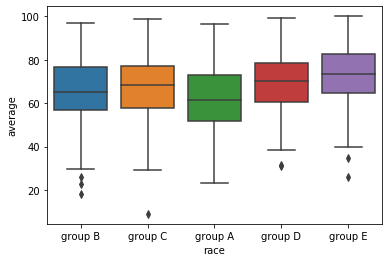

In [93]:
graph = sn.boxplot(data = df_raw, x = 'race', y = 'average')
figure= graph.get_figure()
figure.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/groupimage.jpeg")


#on observing the graph below we can clearly say that there is slight
# variation in avg and group E has highest average on comparing with other groups

In [98]:
#Visualization for Parential education


df_raw['parent_edu'].unique()



array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [117]:
df_raw.parent_edu.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_edu, dtype: int64

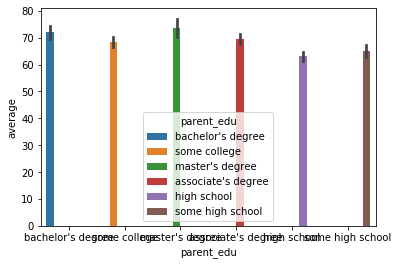

In [106]:
parentgraph= sn.barplot(data = df_raw, x = 'parent_edu', y= 'average', hue = 'parent_edu')
fig_parent= parentgraph.get_figure()
fig_parent.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/parentimage.jpeg")

#masters degree has better avg score

In [107]:
#Visualization for lunch
df_raw['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [118]:
#find the count
df_raw.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

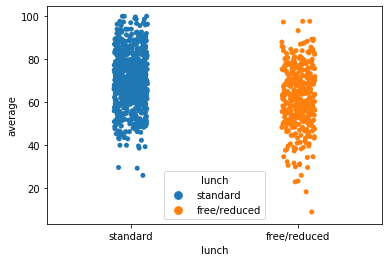

In [111]:
lunch_graph= sn.stripplot(x ='lunch', y= 'average',hue='lunch', data = df_raw)
lunch_fig= lunch_graph.get_figure()
lunch_fig.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/lunchimage.jpeg")

# based on garph we can clearly say that standard feature has better average score


In [112]:
#Visualization for test_prep
df_raw['test_prep'].unique()

array(['none', 'completed'], dtype=object)

In [119]:
#find thr count
df_raw.test_prep.value_counts()

none         642
completed    358
Name: test_prep, dtype: int64

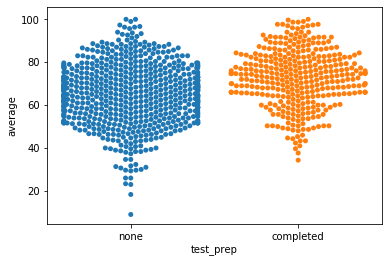

In [120]:

graph_testprep=sn.swarmplot(x ='test_prep', y= 'average', data = df_raw)
fig_testprep=graph_testprep.get_figure()
fig_testprep.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/testprep01image.jpeg")



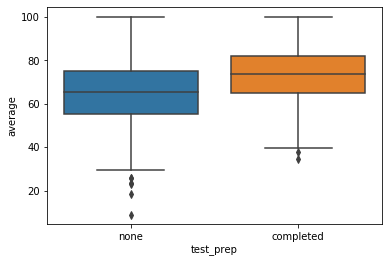

In [121]:
graph_testprep02=sn.boxplot(x ='test_prep', y= 'average', data = df_raw)
fig_testprep02=graph_testprep02.get_figure()
fig_testprep02.savefig("/Users/aditya/Documents/My-files/Umkc/Spring/spring23/PDS/Project/StudentPerformance/Results/testprep02image.jpeg")

# based on both the graphs we can clearly say that test_prep completed has better average score